In [1]:
import pandas as pd
import numpy as np

from shapleyx import rshdmr

import matplotlib.pyplot as plt
from scipy.stats import qmc

%matplotlib widget  


In [2]:
def get_column_labels(n):
    column_labels = []
    for column_index in range(1,n+1):
        column_labels.append('X' + str(column_index)) 
    return column_labels

def ishigami(m):
    n=3
    a=7
    b=0.1
    #a=2
    #b=1
    sampler = qmc.Sobol(d=n, scramble=True, seed=123)
    S = sampler.random_base2(m=m)
    S=S*2*np.pi - np.pi
    Y = np.sin(S[  : ,0]) + a*(np.sin(S[  : ,1])**2) + b*S[  : ,2]**4 * np.sin(S[  : ,0])
    data = pd.DataFrame(S, columns=get_column_labels(n) ) 
    data['Y'] = Y
    return data

    
    

In [3]:
# m = 6 -> 64 samples
# m = 7 -> 128 samples
# m = 8 -> 256 samples
# m = 9 -> 512 samples
# m = 10 -> 1024 samples
# m = 11 -> 2048 samples 
# m = 12 -> 4096 samples
# m = 13 -> 8192 samples

m=9 
dataframe = ishigami(m)
print(len(dataframe), 'samples generated')

512 samples generated


In [4]:
dataframe


,X1,X2,X3,Y
0,0.607133,0.982525,-0.234066,5.415103
1,-1.743749,-2.409093,1.878209,0.919442
2,-0.632661,2.509733,-2.727369,-1.420984
3,1.728958,-1.090534,1.032413,6.605523
4,2.709205,1.710561,3.031147,10.820581
...,...,...,...,...
507,2.715112,-0.379987,0.981532,1.415076
508,1.731493,2.519184,2.906674,10.412470
509,-0.619277,-1.093328,-1.261195,4.794509
510,-1.766221,1.004507,0.416829,4.001217


Found a DataFrame

Transforming data to unit hypercube

Feature: X1, Min Value: -3.1390, Max Value: 3.1305
Feature: X2, Min Value: -3.1393, Max Value: 3.1356
Feature: X3, Min Value: -3.1368, Max Value: 3.1332

Building basis functions

Total basis functions in basis set : 285
Total number of features in basis set is 285

Running regression analysis

running ARD
Iteration: 0     Mean CV Score: 0.4653, Percentage Change: inf%
Iteration: 1     Mean CV Score: 0.6034, Percentage Change: 29.68%
Iteration: 2     Mean CV Score: 0.7358, Percentage Change: 21.93%
Iteration: 3     Mean CV Score: 0.8556, Percentage Change: 16.29%
Iteration: 4     Mean CV Score: 0.9420, Percentage Change: 10.10%
Iteration: 5     Mean CV Score: 0.9667, Percentage Change: 2.62%
Iteration: 6     Mean CV Score: 0.9784, Percentage Change: 1.21%
Iteration: 7     Mean CV Score: 0.9862, Percentage Change: 0.80%
Iteration: 8     Mean CV Score: 0.9945, Percentage Change: 0.84%
Iteration: 9     Mean CV Score: 0.9975, Percenta

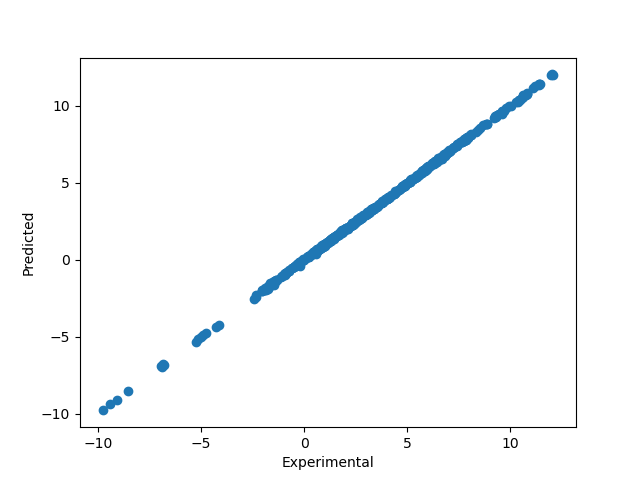


Running bootstrap resampling 1000 samples for 95.0% CI

 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 

Completed bootstrap resampling


                  Completed all analysis
                 ------------------------

Either you run the day or the day runs you.  Jim Rohn



In [5]:

model = rshdmr(dataframe,
               polys = [10],
               n_iter = 250,
               method = 'ard_cv'
              )
               
sob, shap, total = model.run_all() 

In [19]:
sob

,derived_labels,index,lower,upper
0,X1,0.313310,0.311955,0.314688
1,X1_X2_X3,0.000008,-0.000001,0.000024
2,X1_X3,0.241715,0.240060,0.243293
3,X2,0.444622,0.442624,0.446481


In [9]:
shap

,label,effect,scaled effect,lower,upper
0,X1,0.434119,0.434195,0.433184,0.435288
1,X2,0.444818,0.444897,0.443625,0.446086
2,X3,0.120887,0.120908,0.120402,0.121460


<Axes: title={'center': 'Sobol indices'}>

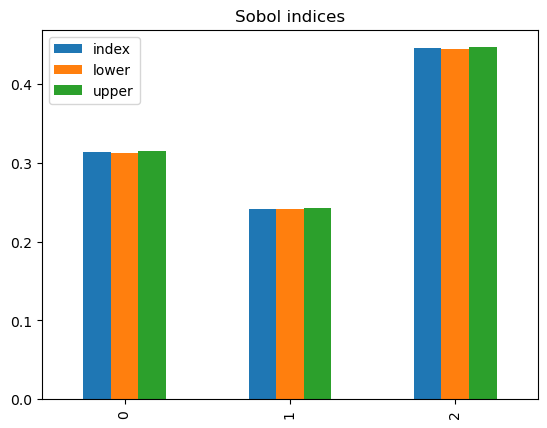

In [6]:
sob.plot(kind='bar', title='Sobol indices')

[Text(0, 0, 'X1'), Text(1, 0, 'X2'), Text(2, 0, 'X3')]

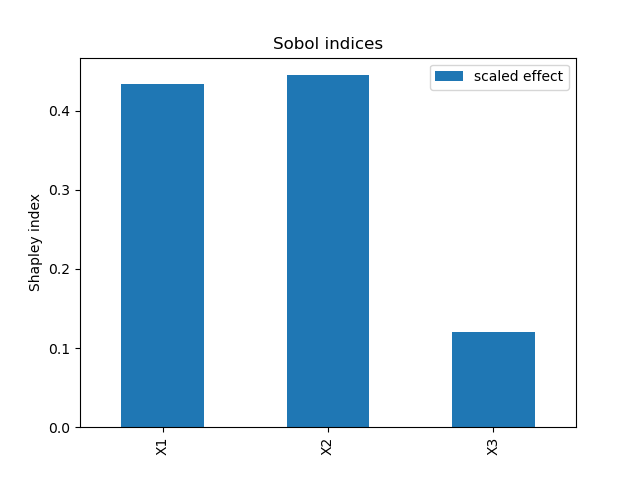

In [6]:
shap[['scaled effect']].plot(kind='bar', title='Sobol indices', ylabel='Shapley index')
plt.gca().set_xticklabels(shap['label'])


In [17]:
shap.plot?

Signature:      shap.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x0000014291006900>
File:           d:\apps\anaconda\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 

<Axes: title={'center': 'Shapley indices'}, xlabel='Feature', ylabel='Shapley index'>

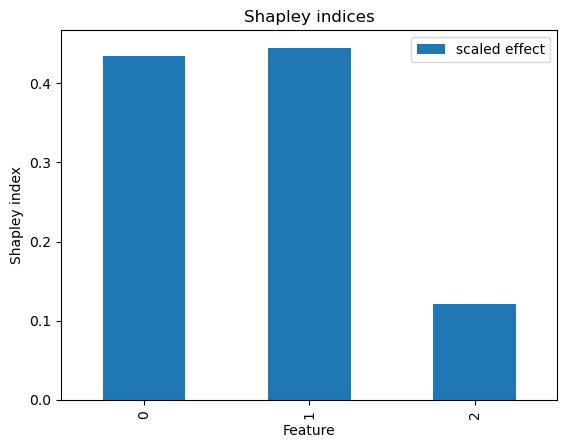

In [18]:
shap[['scaled effect']].plot(kind='bar', title='Shapley indices', xlabel='Feature', ylabel='Shapley index', )

In [9]:
total

,label,total
0,X1,0.999022
1,X2,0.000581
2,X3,0.615846


In [7]:
model.X_T_L

,X1_1,X1_2,X1_3,X1_4,X1_5,X2_1,X2_2,X2_3,X2_4,X2_5,X3_1,X3_2,X3_3,X3_4,X3_5
0,0.371119,-0.964048,-0.785276,0.636178,1.058773,1.671515,2.005713,2.114892,2.031728,1.780855,-2.542879,6.111437,-15.104265,37.852747,-95.441184
1,-7.772574,66.425653,-579.916290,5097.084482,-44935.433903,-10.077394,112.422636,-1279.631987,14660.362253,-168455.033248,4.774256,24.365892,127.584520,673.318184,3565.337719
2,-3.923653,16.094163,-67.901414,289.029872,-1234.832635,6.961919,53.071188,413.578746,3245.252604,25542.834874,-11.179933,138.626033,-1753.173659,22315.547440,-284879.779478
3,4.257237,19.145289,88.463344,412.195723,1927.413085,-5.509770,32.822758,-200.291187,1231.257719,-7593.299132,1.844332,2.685025,3.760011,5.242952,7.338949
4,7.652911,64.361920,553.006403,4783.726966,41506.457940,4.193508,18.543159,84.264198,386.168969,1776.047221,8.768152,84.836957,837.996565,8332.460379,83099.478011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,7.673374,64.712562,557.548481,4836.267728,42077.571265,-3.048365,9.271331,-29.073856,92.206725,-293.779260,1.668077,1.992876,2.086163,1.981412,1.705212
508,4.266016,19.228944,89.052078,415.878584,1949.030786,6.994657,53.582035,419.591859,3308.435848,26166.626155,8.336964,76.590885,718.514648,6785.603429,64274.947508
509,-3.877288,15.689775,-65.313861,274.336069,-1156.574968,-5.519450,32.942118,-201.393143,1240.326760,-7663.397060,-6.100959,40.497096,-275.089949,1881.999191,-12915.939345
510,-7.850420,67.785391,-597.877897,5308.978238,-47284.459459,1.747665,2.296813,2.790472,3.275963,3.779418,-0.288112,-1.025228,0.629704,0.823767,-0.904180


In [ ]:
import math
import numpy as np
import scipy.special as sp
import pandas as pd 
from itertools import combinations 

def shift_legendre(n, x):
        """
        Computes the shifted Legendre polynomial of degree `n` evaluated at `x` and scales
        by a normalization factor.

        Args:
            n (int): Degree of the shifted Legendre polynomial.
            x (float or array-like): Point(s) at which the polynomial is evaluated.

        Returns:
            float or array-like: Value of the shifted Legendre polynomial at `x`.
        """
        normalization_factor = math.sqrt(2 * n + 1)
        polynomial_value = sp.eval_sh_legendre(n, x)
        return normalization_factor * polynomial_value


class legendre_expand():
    """
    Expands the input features using Legendre polynomials and generates polynomial combinations.
    
    This method performs the following steps:
    1. For each column in `self.X_T`, it computes Legendre polynomial expansions up to the order specified by `self.max_1st`.
       The results are stored in `self.X_T_L` as new columns, with column names in the format `<column>_<order>`.
    2. Generates polynomial combinations of the expanded features based on the polynomial orders specified in `self.polys`.
    3. Constructs a matrix of polynomial terms and concatenates them into a final DataFrame, which is stored in `self.X_T_L`.
    
    Attributes:
        self.primitive_variables (list): A list of primitive variable names used in the expansion.
        self.poly_orders (list): A list of polynomial orders corresponding to each primitive variable.
        self.X_T_L (pd.DataFrame): A DataFrame containing the expanded Legendre polynomial terms and their combinations.
    
    Steps:
        1. For each column in `self.X_T`:
            - Compute Legendre polynomial expansions for orders from 1 to `self.max_1st`.
            - Append the primitive variable name and polynomial order to `self.primitive_variables` and `self.poly_orders`.
            - Store the expanded terms in `self.X_T_L` with appropriate column headings.
        2. For each polynomial order in `self.polys`:
            - Generate a basis set of terms for the current polynomial order.
            - Create valid combinations of terms, ensuring that each combination contains unique primitive variables.
            - Compute the polynomial terms by multiplying the corresponding columns in `self.X_T_L`.
            - Store the computed terms in a matrix and concatenate them into the final DataFrame `generated_set`.
        3. Update `self.X_T_L` with the final generated set of polynomial terms.
    
    Notes:
        - The method assumes that `self.X_T`, `self.max_1st`, `self.polys`, and `self.Y` are properly initialized.
        - The `self.shift_legendre` method is used to compute the Legendre polynomial values.
        - The `combinations` function from the `itertools` module is used to generate term combinations.
        - The method prints the number of terms generated for each polynomial order.
    
    Example:
        If `self.X_T` contains columns 'A' and 'B', and `self.max_1st` is 2, the method will compute:
        - Legendre polynomial expansions for 'A_1', 'A_2', 'B_1', and 'B_2'.
        - If `self.polys` is [1, 2], it will generate:
            - First-order terms: 'A_1', 'B_1'.
            - Second-order terms: 'A_1*B_1', 'A_2*B_1', etc.
    """
    
        # Method implementation...
    def __init__(self, X, X_T, max_1st, polys, Y):
        """
        Initializes the legendre_expand class with the given parameters.

        Args:
            X (pd.DataFrame): Original input features.
            X_T (pd.DataFrame): Transformed input features.
            max_1st (int): Maximum order for the first set of Legendre polynomial expansions.
            polys (list): List of polynomial orders for generating combinations.
            Y (pd.Series): Target variable.

        """
        # Initialize attributes
        self.X = X 
        self.X_T = X_T
        self.max_1st = max_1st
        self.polys = polys
        self.Y = Y

        self.primitive_variables = []
        self.poly_orders = []
        self.X_T_L = pd.DataFrame()

    def do_expand(self):
        # Step 1: Compute Legendre polynomial terms
        for column in self.X_T:
            for n in range(1, self.max_1st + 1):
                self.primitive_variables.append(column)
                self.poly_orders.append(n)
                column_heading = f"{column}_{n}"
                self.X_T_L[column_heading] = self.X_T[column].apply(lambda x: shift_legendre(n, x))

        # Step 2: Generate polynomial combinations
        generated_set = pd.DataFrame()
        for order, max_poly_order in enumerate(self.polys, start=1):
            basis_set = [f"{x}_{j+1}" for x in self.X.columns for j in range(max_poly_order)]
            
            # Generate valid combinations
            combo_list = [
                combo for combo in combinations(basis_set, order)
                if len(set(term.split('_')[0] for term in combo)) == order
            ]
            
            total_combinations = len(combo_list)
            print(f"Number of terms of order {order} is {total_combinations}")

            # Compute polynomial terms
            matrix = np.zeros((len(self.Y), total_combinations))
            term_labels = []
            
            for term_index, combination in enumerate(combo_list):
                term_label = "*".join(combination)
                term_labels.append(term_label)
                
                # Multiply terms in the combination
                product = np.ones(len(self.Y))
                for term in combination:
                    product *= self.X_T_L[term]
                matrix[:, term_index] = product

            # Store results in a DataFrame
            em = pd.DataFrame(matrix, columns=term_labels)
            generated_set = pd.concat([generated_set, em], axis=1)

        # Step 3: Update the final DataFrame
        self.X_T_L = generated_set

    def get_expanded(self):
        return self.X_T_L
    
    def get_primitive_variables(self):
        return self.primitive_variables
    
    def get_poly_orders(self):
        return self.poly_orders 

In [9]:
import math
import numpy as np
import scipy.special as sp
import pandas as pd 
from itertools import combinations, product 

def shift_legendre(n, x):
        """
        Computes the shifted Legendre polynomial of degree `n` evaluated at `x` and scales
        by a normalization factor.

        Args:
            n (int): Degree of the shifted Legendre polynomial.
            x (float or array-like): Point(s) at which the polynomial is evaluated.

        Returns:
            float or array-like: Value of the shifted Legendre polynomial at `x`.
        """
        normalization_factor = math.sqrt(2 * n + 1)
        polynomial_value = sp.eval_sh_legendre(n, x)
        return normalization_factor * polynomial_value

def get_hdmr_features(labels, poly_degrees):
    """Helper method to create meaningful feature names"""
    feature_names = []
    order = len(poly_degrees) 
    dims = len(labels)
    
    for current_order in range(1, order + 1):
        poly_degree = poly_degrees[current_order - 1] 
        for vars_ in combinations(range(dims), current_order):
            for degrees in product(range(1, poly_degree + 1), repeat=current_order):
                name_parts = [f'{labels[var]}_{degree}' for var, degree in zip(vars_, degrees)]
                feature_names.append('*'.join(name_parts))
    return feature_names
    
    # Polynomial chaos expansion

def generate_multi_indices_sum(total_degree, current_dim):
    if current_dim == 1:
        return [(total_degree,)]
    indices = []
    for i in range(total_degree + 1):
        for mi in generate_multi_indices_sum(total_degree - i, current_dim - 1):
            indices.append((i,) + mi)
    return indices

def generate_multi_indices(max_degree, dim):
    indices = []
    for total_degree in range(max_degree + 1):
        indices += generate_multi_indices_sum(total_degree, dim)
    return indices


def get_polynomial_chaos_features(labels, max_degree):
    feature_names = []
    dims = len(labels)
    for vars_ in generate_multi_indices(max_degree, dims):
        name_parts = [f'{labels[i]}_{degree}' for i, degree in enumerate(vars_) if degree > 0]
        feature_names.append('*'.join(name_parts))
    feature_names.pop(0)
    return feature_names


class legendre_expand():

    def __init__(self, X_T, polys):
        self.X_T = X_T
        self.polys = polys
        self.max_1st = max(polys)
        self.data_length = len(X_T) 
    

        self.primitive_variables = []
        self.poly_orders = []
        self.X_T_L = pd.DataFrame()
    
    def do_expand(self):
        # Step 1: Compute all of the required Legendre polynomial terms 
        for column in self.X_T:
            for n in range(1, self.max_1st + 1):
                self.primitive_variables.append(column)
                self.poly_orders.append(n)
                column_heading = f"{column}_{n}"
                self.X_T_L[column_heading] = self.X_T[column].apply(lambda x: shift_legendre(n, x))

    def build_basis_set(self):
        if len(self.polys) == 1:
            features = get_polynomial_chaos_features(self.X_T.columns, self.polys[0]) 
        else:
            features = get_hdmr_features(self.X_T.columns, self.polys)
        num_features = len(features) 
        print(f"Total number of features in basis set is {num_features}")
        self.do_expand()
        basis_set = np.ones((self.data_length, num_features))
        for index, feature in enumerate(features):
            terms = feature.split('*')
            for term in terms:
                var, degree = term.split('_')
                basis_set[:, index] *= self.X_T_L[f"{var}_{degree}"]

        self.X_T_L = pd.DataFrame(basis_set, columns=features)


    def get_expanded(self):
        return self.X_T_L
    
    def get_primitive_variables(self):
        return self.primitive_variables
    
    def get_poly_orders(self):
        return self.poly_orders



In [11]:
polys = [5] 
tl = legendre_expand(model.X_T, polys=polys)
tl.build_basis_set()


Total number of features in basis set is 55


In [12]:
tl.X_T_L

,X3_1,X2_1,X1_1,X3_2,X2_1*X3_1,X2_2,X1_1*X3_1,X1_1*X2_1,X1_2,X3_3,...,X1_2*X3_3,X1_2*X2_1*X3_2,X1_2*X2_2*X3_1,X1_2*X2_3,X1_3*X3_2,X1_3*X2_1*X3_1,X1_3*X2_2,X1_4*X3_1,X1_4*X2_1,X1_5
0,-0.128331,0.543431,0.337803,-1.099621,-0.069739,-0.787859,-0.043351,0.183573,-0.990454,0.291353,...,-0.288572,0.591864,-0.100142,1.030935,0.797155,0.050556,0.571147,-0.091895,0.389137,1.004917
1,1.038689,-1.328922,-0.961120,0.088186,-1.380338,0.856453,-0.998305,1.277254,-0.085248,-0.953461,...,0.081281,0.009990,-0.075836,-0.004898,0.094539,-1.479780,0.918154,-1.136999,1.454702,0.133656
2,-1.505867,1.386532,-0.347215,1.417260,-2.087932,1.031352,0.522860,-0.481425,-0.983245,-0.896400,...,0.881381,-1.932152,1.527059,-0.212533,1.052012,-1.549842,0.765558,-1.045225,0.962394,-1.021294
3,0.571392,-0.601007,0.957641,-0.753009,-0.343411,-0.714189,0.547188,-0.575549,-0.092713,-1.071753,...,0.099365,-0.041958,0.037834,-0.102052,0.810463,0.369613,0.768682,-0.621408,0.653616,-0.117184
4,1.675682,0.945346,1.499252,2.021304,1.584099,-0.118870,2.512269,1.417312,1.395035,2.149909,...,2.999198,2.665677,-0.277874,-1.521475,1.727253,1.353651,-0.101577,0.107263,0.060513,-0.746701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.543281,-0.208748,1.502516,-0.788042,-0.113409,-1.069315,0.816288,-0.313647,1.405989,-1.040695,...,-1.463205,0.231288,-0.816792,0.656207,-0.689634,-0.099247,-0.935782,0.049788,-0.019130,-0.719421
508,1.606911,1.391749,0.959041,1.768912,2.236417,1.047558,1.541093,1.334744,-0.089712,1.599912,...,-0.143531,-0.220860,-0.151015,-0.021768,-1.900868,-2.403247,-1.125703,-1.752191,-1.517576,-0.123809
509,-0.695814,-0.602550,-0.339820,-0.576729,0.419263,-0.712113,0.236452,0.204759,-0.988926,1.165479,...,-1.152572,-0.343660,-0.490012,-1.089935,-0.420247,0.305506,-0.518898,-0.495006,-0.428658,-1.008502
510,0.231285,0.555567,-0.973537,-1.058227,0.128494,-0.772948,-0.225164,-0.540865,-0.058391,-0.514192,...,0.030024,0.034329,0.010439,0.061584,-1.117618,0.135706,-0.816328,-0.258847,-0.621772,0.192661


In [77]:


def generate_multi_indices_sum(total_degree, current_dim):
    if current_dim == 1:
        return [(total_degree,)]
    indices = []
    for i in range(total_degree + 1):
        for mi in generate_multi_indices_sum(total_degree - i, current_dim - 1):
            indices.append((i,) + mi)
    return indices

def generate_multi_indices(max_degree, dim):
    indices = []
    for total_degree in range(max_degree + 1):
        indices += generate_multi_indices_sum(total_degree, dim)
    return indices


def get_polynomial_chaos_features(labels, max_degree):
    feature_names = []
    dims = len(labels)
    for vars_ in generate_multi_indices(max_degree, dims):
        name_parts = [f'{labels[i]}_{degree}' for i, degree in enumerate(vars_) if degree > 0]
        feature_names.append('*'.join(name_parts))
    feature_names.pop(0)
    return feature_names


In [78]:
test  = get_polynomial_chaos_features(model.X_T.columns, 5)
test

['X3_1',
 'X2_1',
 'X1_1',
 'X3_2',
 'X2_1*X3_1',
 'X2_2',
 'X1_1*X3_1',
 'X1_1*X2_1',
 'X1_2',
 'X3_3',
 'X2_1*X3_2',
 'X2_2*X3_1',
 'X2_3',
 'X1_1*X3_2',
 'X1_1*X2_1*X3_1',
 'X1_1*X2_2',
 'X1_2*X3_1',
 'X1_2*X2_1',
 'X1_3',
 'X3_4',
 'X2_1*X3_3',
 'X2_2*X3_2',
 'X2_3*X3_1',
 'X2_4',
 'X1_1*X3_3',
 'X1_1*X2_1*X3_2',
 'X1_1*X2_2*X3_1',
 'X1_1*X2_3',
 'X1_2*X3_2',
 'X1_2*X2_1*X3_1',
 'X1_2*X2_2',
 'X1_3*X3_1',
 'X1_3*X2_1',
 'X1_4',
 'X3_5',
 'X2_1*X3_4',
 'X2_2*X3_3',
 'X2_3*X3_2',
 'X2_4*X3_1',
 'X2_5',
 'X1_1*X3_4',
 'X1_1*X2_1*X3_3',
 'X1_1*X2_2*X3_2',
 'X1_1*X2_3*X3_1',
 'X1_1*X2_4',
 'X1_2*X3_3',
 'X1_2*X2_1*X3_2',
 'X1_2*X2_2*X3_1',
 'X1_2*X2_3',
 'X1_3*X3_2',
 'X1_3*X2_1*X3_1',
 'X1_3*X2_2',
 'X1_4*X3_1',
 'X1_4*X2_1',
 'X1_5']

In [61]:
def generate_multi_indices(max_degree, dim):
    indices = []
    for total_degree in range(max_degree + 1):
        indices += generate_multi_indices_sum(total_degree, dim)
    return indices

In [62]:
generate_multi_indices(5, 3)

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (1, 0, 0),
 (0, 0, 2),
 (0, 1, 1),
 (0, 2, 0),
 (1, 0, 1),
 (1, 1, 0),
 (2, 0, 0),
 (0, 0, 3),
 (0, 1, 2),
 (0, 2, 1),
 (0, 3, 0),
 (1, 0, 2),
 (1, 1, 1),
 (1, 2, 0),
 (2, 0, 1),
 (2, 1, 0),
 (3, 0, 0),
 (0, 0, 4),
 (0, 1, 3),
 (0, 2, 2),
 (0, 3, 1),
 (0, 4, 0),
 (1, 0, 3),
 (1, 1, 2),
 (1, 2, 1),
 (1, 3, 0),
 (2, 0, 2),
 (2, 1, 1),
 (2, 2, 0),
 (3, 0, 1),
 (3, 1, 0),
 (4, 0, 0),
 (0, 0, 5),
 (0, 1, 4),
 (0, 2, 3),
 (0, 3, 2),
 (0, 4, 1),
 (0, 5, 0),
 (1, 0, 4),
 (1, 1, 3),
 (1, 2, 2),
 (1, 3, 1),
 (1, 4, 0),
 (2, 0, 3),
 (2, 1, 2),
 (2, 2, 1),
 (2, 3, 0),
 (3, 0, 2),
 (3, 1, 1),
 (3, 2, 0),
 (4, 0, 1),
 (4, 1, 0),
 (5, 0, 0)]